In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

# Parameters
cv = 5
test_size = 0.3  # 30% test size as required
random_state = 42

In [4]:
df = pd.read_excel("../data/data.xlsx", sheet_name="Part4")
print("Data loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Data loaded successfully!

Dataset shape: (300, 3)
Columns: ['y', 'x1', 'x2']


In [5]:
# Display first few rows to verify data loading
print("\n First 10 rows of the dataset:")
print(df.head(10))
# Display dataset info
print("\n Dataset information:")
print(df.info())


 First 10 rows of the dataset:
   y        x1        x2
0  0 -1.508140  0.641881
1  1  2.152510  1.290190
2  1  0.967480  1.036760
3  0 -0.922700  1.284172
4  0 -1.384590  0.829383
5  0 -1.550430  0.728892
6  0 -1.283790  0.740585
7  1  2.615111  0.297132
8  0 -1.854680  0.456074
9  0 -0.327500  1.324971

 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       300 non-null    int64  
 1   x1      300 non-null    float64
 2   x2      300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
None


In [6]:
# Define features and target
X = df[['x1', 'x2']].copy()
y = df['y'].copy()

In [7]:
class_counts = Counter(y)
total_samples = len(y)

for class_label in sorted(class_counts.keys()):
    count = class_counts[class_label]
    percentage = (count / total_samples) * 100
    print(f"   Class {class_label}: {count:2d} samples ({percentage:5.2f}%)")

print(f"\nTotal samples: {total_samples}")

   Class 0: 154 samples (51.33%)
   Class 1: 146 samples (48.67%)

Total samples: 300


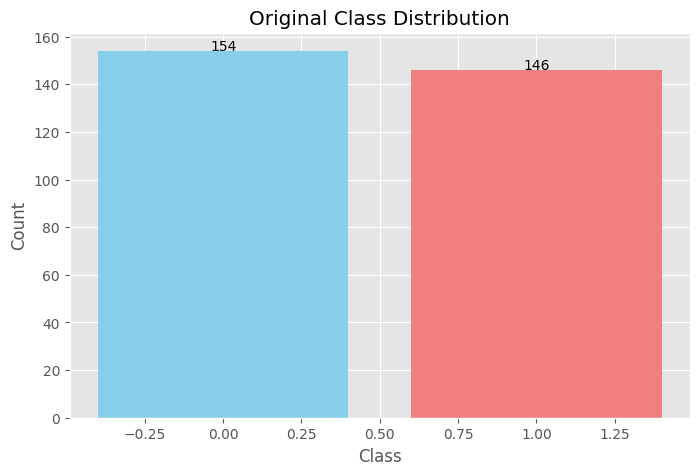

In [8]:
plt.figure(figsize=(8, 5))
classes, counts = zip(*sorted(class_counts.items()))
plt.bar(classes, counts, color=['skyblue', 'lightcoral'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
for i, count in enumerate(counts):
    plt.text(classes[i], count + 0.1, str(count), ha='center')
plt.show()

In [9]:
# Train/test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, 
    stratify=y,
    random_state=random_state
)

print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 210 samples
Test set size: 90 samples


In [10]:
# Create pipeline with scaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=random_state))
])

# Define hyperparameter grid
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.01, 0.1]
}

In [11]:
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'scaler': [StandardScaler(), MinMaxScaler(), ...], 'svc__C': [0.1, 1, ...], 'svc__gamma': ['scale', 'auto', ...], 'svc__kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [12]:
# Get best model and make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'scaler': MinMaxScaler(), 'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [13]:
# Create mesh grid and plot decision boundaries
plt.figure(figsize=(10, 8))

# Create mesh grid
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<Figure size 1000x800 with 0 Axes>

In [15]:
# Make predictions on mesh grid
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1', 'x2'])
Z = best_model.predict(mesh_points)
Z = Z.reshape(xx.shape)

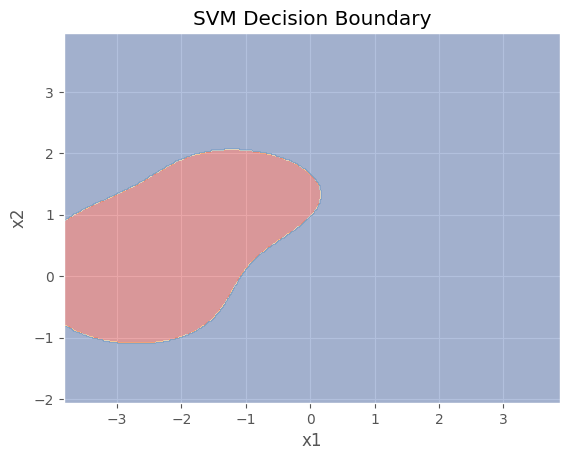

In [19]:
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.xlabel('x1')
plt.ylabel('x2') 
plt.title('SVM Decision Boundary')
plt.show()